In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv


In [2]:
file_path = '/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv'
data = pd.read_csv(file_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Look at the data

In [4]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [5]:
data.shape

(10000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [7]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [8]:
data.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [9]:
data = data.drop(columns=['Transaction ID'])
data.columns = data.columns.str.lower()

In [10]:
data['item'].value_counts()

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [11]:
data = data[~data['item'].isin(['ERROR'])]
data['item'] = data['item'].replace('UNKNOWN', pd.NA)
data['item'] = data['item'].replace('NaN', pd.NA)

In [12]:
data['quantity'].value_counts()

quantity
5          1950
2          1916
4          1812
3          1795
1          1774
UNKNOWN     166
ERROR       162
Name: count, dtype: int64

In [13]:
data = data[~data['quantity'].isin(['ERROR'])]
data['quantity'] = data['quantity'].replace('UNKNOWN', pd.NA)

In [14]:
data['price per unit'].value_counts()

price per unit
3.0        2318
4.0        2232
2.0        1172
5.0        1141
1.0        1091
1.5        1078
ERROR       186
UNKNOWN     159
Name: count, dtype: int64

In [15]:
data = data[~data['price per unit'].isin(['ERROR'])]
data['price per unit'] = data['price per unit'].replace('UNKNOWN', pd.NA)

In [16]:
data['total spent'].value_counts()

total spent
6.0        916
12.0       888
3.0        870
4.0        869
20.0       697
15.0       684
8.0        637
10.0       491
2.0        466
9.0        444
5.0        432
16.0       420
25.0       236
1.0        216
7.5        215
4.5        211
1.5        195
ERROR      155
UNKNOWN    152
Name: count, dtype: int64

In [17]:
data = data[~data['total spent'].isin(['ERROR'])]
data['total spent'] = data['total spent'].replace('UNKNOWN', pd.NA)

In [18]:
data['payment method'].value_counts()

payment method
Digital Wallet    2106
Credit Card       2091
Cash              2085
ERROR              280
UNKNOWN            269
Name: count, dtype: int64

In [19]:
data = data[~data['payment method'].isin(['ERROR'])]
data['payment method'] = data['payment method'].replace('UNKNOWN', pd.NA)

In [20]:
data['location'].value_counts()

location
Takeaway    2708
In-store    2697
ERROR        320
UNKNOWN      302
Name: count, dtype: int64

In [21]:
data = data[~data['location'].isin(['ERROR'])]
data['location'] = data['location'].replace('UNKNOWN', pd.NA)

In [22]:
data['transaction date'].value_counts()

transaction date
UNKNOWN       140
ERROR         125
2023-08-07     36
2023-09-21     34
2023-07-21     34
             ... 
2023-04-26     13
2023-11-24     13
2023-02-17     12
2023-04-22     12
2023-04-27     11
Name: count, Length: 367, dtype: int64

In [23]:
data = data[~data['transaction date'].isin(['ERROR'])]
data['transaction date'] = data['transaction date'].replace('UNKNOWN', pd.NA)

## 2. Working with missing values

In [24]:
data.isna().sum()

item                 590
quantity             269
price per unit       299
total spent          291
payment method      2516
location            3158
transaction date     282
dtype: int64

In [25]:
for column in data.columns:
    moda= data[column].mode()
    if not moda.empty:
        data[column] = data[column].fillna(moda[0])

In [26]:
data.isna().sum()

item                0
quantity            0
price per unit      0
total spent         0
payment method      0
location            0
transaction date    0
dtype: int64

In [27]:
data.drop_duplicates(keep='last', inplace=True)

In [28]:
data['quantity'] = data['quantity'].astype(int)
data['price per unit'] = data['price per unit'].astype(float)
data['total spent'] = data['total spent'].astype(float)
data['transaction date'] = data['transaction date'].astype('datetime64[ns]')

## 3. Analysis the data distribution

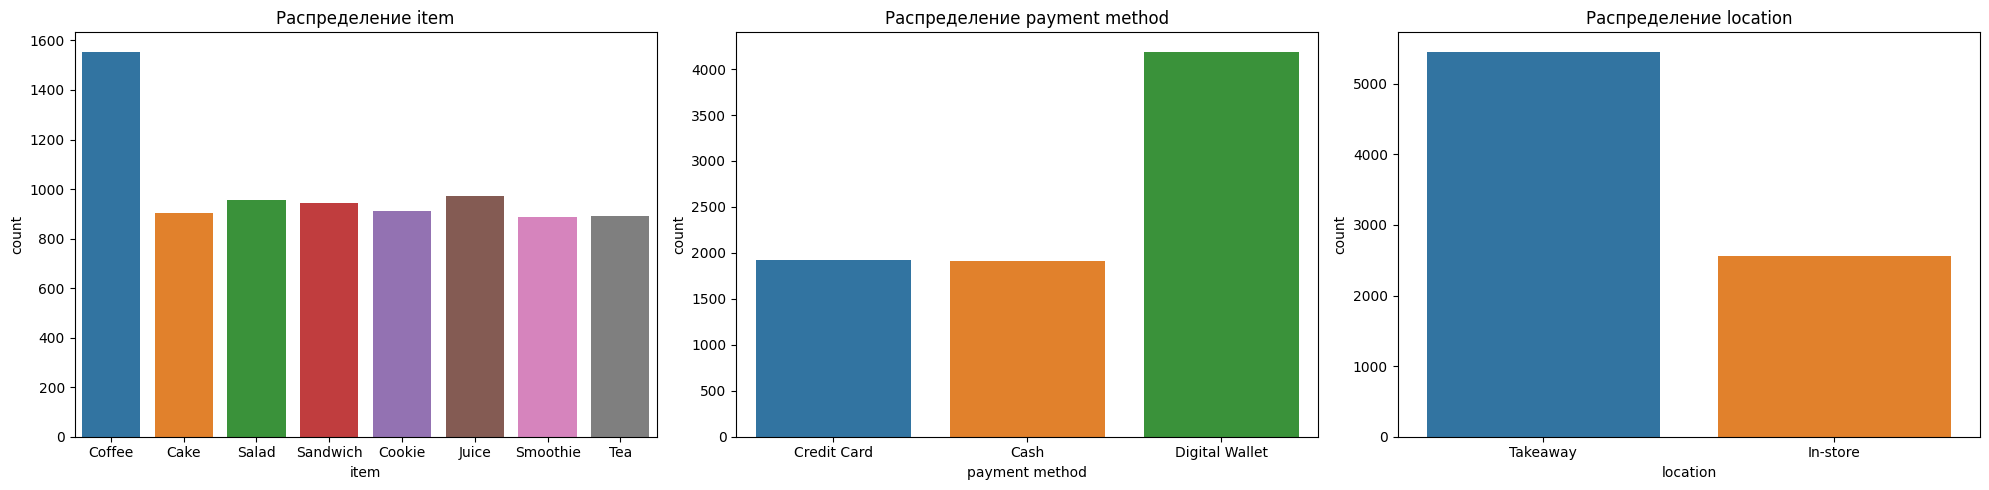

In [29]:
data_cat = data[['item', 'payment method', 'location']]

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=data_cat, x='item')
plt.title('Распределение item')

plt.subplot(1, 3, 2)
sns.countplot(data=data_cat, x='payment method')
plt.title('Распределение payment method')

plt.subplot(1, 3, 3)
sns.countplot(data=data_cat, x='location')
plt.title('Распределение location')

plt.tight_layout()
plt.show()

In [30]:
data_num = data[['quantity', 'price per unit', 'total spent']]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


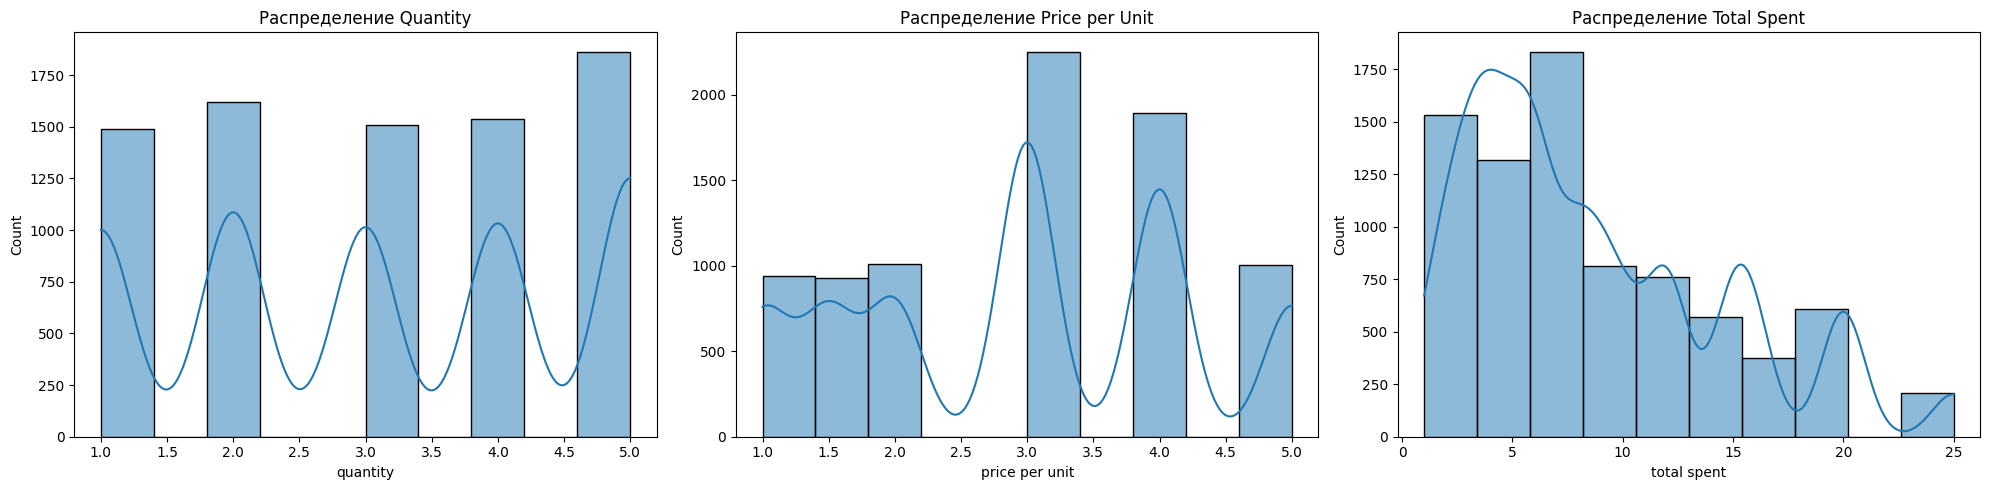

In [31]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=data_num, x='quantity', bins=10, kde=True)
plt.title('Распределение Quantity')

plt.subplot(1, 3, 2)
sns.histplot(data=data_num, x='price per unit', bins=10, kde=True)
plt.title('Распределение Price per Unit')

plt.subplot(1, 3, 3)
sns.histplot(data=data_num, x='total spent', bins=10, kde=True)
plt.title('Распределение Total Spent')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


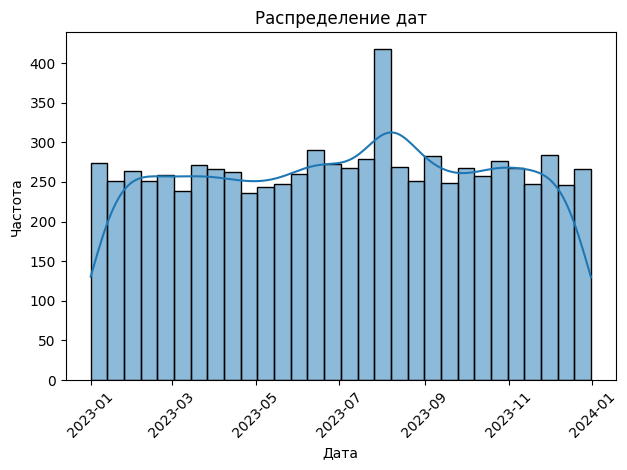

In [32]:
data['transaction date'] = pd.to_datetime(data['transaction date'])

sns.histplot(data['transaction date'], bins=30, kde=True)
plt.title('Распределение дат')
plt.xlabel('Дата')
plt.ylabel('Частота')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Data outliers

In [33]:
for column in data_num:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    outliers_after = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print("количество выбросов", outliers_after.shape[0])

количество выбросов 0
количество выбросов 0
количество выбросов 0


## 5. Correlation

In [34]:
correlation_matrix = data_num.corr()

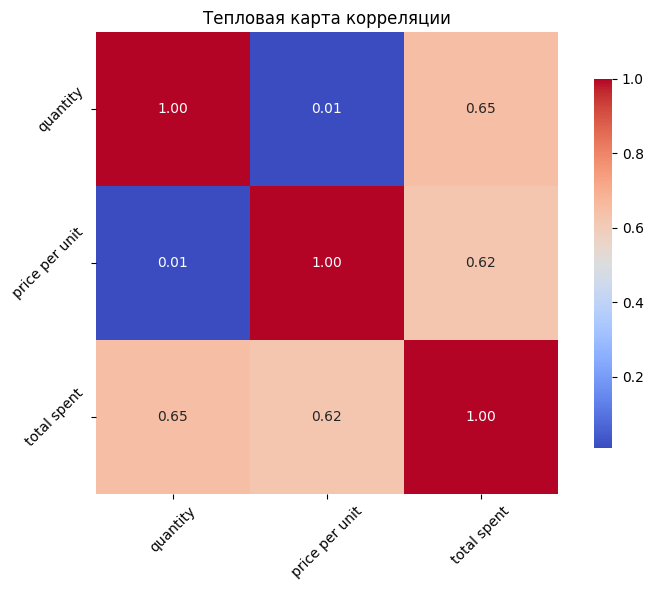

In [35]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Тепловая карта корреляции')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()